In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle("../assets/reports/cpp_reports.pkl")
len(df)

932

In [3]:
bad_is = []
for i, s in enumerate(df["solution"].tolist()):
    if (np.array(s) > 18).any():
        bad_is.append(i)
        # print("Bad:", i, s)

In [4]:
len(bad_is)

31

In [152]:
np.array(bad_is)

array([208, 222, 259, 289, 292, 296, 298, 301, 342, 346, 354, 358, 380,
       387, 390, 410, 413, 447, 449, 479, 482, 506, 508, 557, 574, 579,
       600, 608, 609, 634, 654])

In [151]:
df.to_dict("records")[609]

{'i': 609,
 'state': array([11, 14,  2, 19, 40, 48, 15, 16,  6, 45, 46, 38, 32, 31, 52, 51, 10,
        53,  9, 43, 20, 34, 49,  3, 26, 41, 17, 27, 21, 18, 37, 13, 50, 24,
         1,  0,  8,  5, 44, 25,  4, 39, 36, 23, 42, 35,  7, 33, 30, 22, 12,
        29, 28, 47]),
 'target_distance': 18,
 'solution': [-1,
  14,
  1,
  7,
  2,
  2,
  14,
  12,
  11,
  14,
  9,
  15,
  1,
  14,
  10,
  0,
  17,
  0,
  1096177120],
 'h_values': [16.822,
  15.057,
  13.543,
  14.918,
  13.396,
  12.104,
  11.965,
  10.987,
  9.144,
  9.202,
  7.283,
  7.16,
  5.551,
  4.406,
  3.555,
  3.471,
  2.608,
  1.332,
  0.0],
 'visit_nodes': 41036,
 'duration_sec': 12.019}

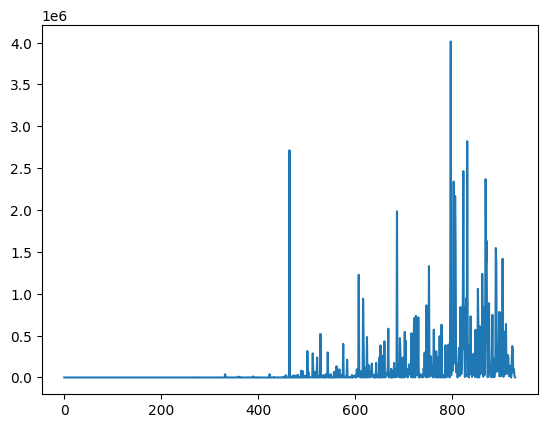

In [5]:
plt.plot(df.visit_nodes)

(array([873.,  32.,  10.,   8.,   2.,   3.,   2.,   1.,   0.,   1.]),
 array([      0.,  401262.,  802524., 1203786., 1605048., 2006310.,
        2407572., 2808834., 3210096., 3611358., 4012620.]),
 <BarContainer object of 10 artists>)

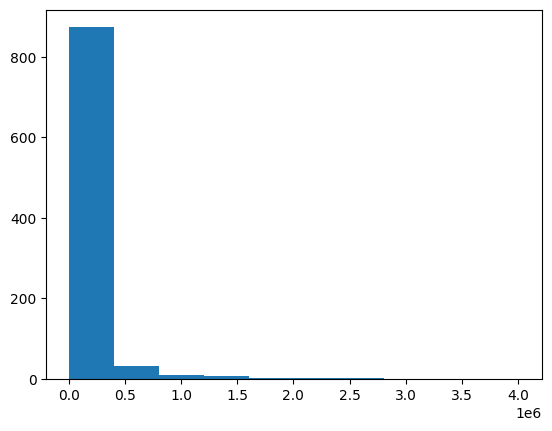

In [6]:
plt.hist(df.visit_nodes)

In [101]:
df["solution"]

0                                                     []
1                                                     []
2                                                     []
3                                                     []
4                                                     []
                             ...                        
692    [-1, 8, 12, 3, 15, 17, 1, 4, 9, 4, 3, 17, 0, 8...
693    [-1, 16, 12, 5, 16, 6, 1, 11, 17, 11, 0, 17, 8...
694    [-1, 5, 10, 5, 10, 8, 2, 14, 5, 14, 4, 13, 4, ...
695    [-1, 7, 1, 16, 7, 16, 0, 15, 9, 17, 7, 2, 10, ...
696    [-1, 12, 11, 7, 0, 14, 4, 9, 2, 7, 7, 3, 6, 14...
Name: solution, Length: 697, dtype: object

In [10]:
df["duration_sec"].sum() / 3600

7.881059444444445

i                                                                593
state              [33, 50, 42, 32, 22, 48, 20, 41, 8, 2, 12, 11,...
target_distance                                                   17
solution           [-1, 5, 2, 0, 6, 13, 9, 4, 1, 16, 5, 2, 14, 7,...
h_values           [18.946, 16.408, 16.221, 15.334, 13.636, 13.09...
visit_nodes                                                      102
duration_sec                                                   0.024
Name: 593, dtype: object

In [12]:
import sys

sys.path.append("/Users/euclid/Projects/DeepDeepCube")

from cube3_game import Cube3Game

In [13]:
game = Cube3Game("../assets/envs/cube_3_3_3_actions.pickle")

In [62]:
i = 608

state = df.iloc[i].state
solution = df.iloc[i].solution

for action in solution[:-1] + [13]:
    if action == -1:
        continue
    
    state = game.apply_action(state, action)
    # print(action, ":", state)

print("is_goal:", game.is_goal_by_state(state))

is_goal: True


In [65]:
df.iloc[-1]["i"]

666

In [61]:
for action in range(len(game.actions)):
    new_state = game.apply_action(state, action)
    is_goal = game.is_goal_by_state(new_state)

    # print(action, ":", new_state)
    if is_goal:
        print("Real action:", action)
        break
    # else:
        # print(action," is not solution!")

Real action: 13


In [22]:
solution

[-1,
 1,
 1,
 17,
 4,
 13,
 6,
 13,
 7,
 5,
 14,
 5,
 9,
 5,
 15,
 9,
 3,
 16,
 12,
 7,
 3,
 6,
 1100179188]

In [23]:
df.iloc[608]

i                                                                608
state              [17, 10, 2, 23, 22, 21, 9, 37, 33, 38, 3, 26, ...
target_distance                                                   18
solution           [-1, 1, 1, 17, 4, 13, 6, 13, 7, 5, 14, 5, 9, 5...
h_values           [21.306, 18.988, 17.14, 16.371, 18.425, 17.355...
visit_nodes                                                  1226039
duration_sec                                                 437.156
Name: 608, dtype: object

In [196]:
df

,i,state,target_distance,solution,h_values,visit_nodes,duration_sec
0,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
1,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
2,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
3,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
4,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,[],[],0,0.000
...,...,...,...,...,...,...,...
927,926,"[27, 50, 11, 10, 13, 48, 53, 52, 38, 26, 34, 9...",28,"[-1, 15, 3, 11, 1, 12, 0, 17, 2, 17, 9, 12, 11...","[25.387, 23.75, 21.707, 21.775, 20.646, 19.088...",57932,16.011
928,927,"[2, 10, 44, 25, 40, 14, 29, 34, 6, 0, 52, 38, ...",28,"[-1, 1, 17, 15, 9, 1, 11, 12, 10, 2, 12, 11, 8...","[24.851, 22.661, 20.684, 19.888, 19.488, 16.98...",100654,28.563
929,928,"[20, 5, 18, 10, 13, 32, 6, 37, 35, 9, 3, 51, 4...",28,"[-1, 15, 7, 10, 3, 13, 14, 0, 17, 10, 14, 1, 1...","[20.966, 21.073, 19.052, 19.057, 17.275, 15.71...",51618,14.035
930,929,"[47, 19, 44, 23, 49, 52, 36, 37, 42, 29, 3, 35...",28,"[-1, 6, 3, 9, 14, 10, 14, 14, 8, 4, 7, 5, 3, 1...","[19.861, 18.367, 16.517, 15.394, 15.36, 14.233...",8592,2.155
